In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [ ]:
train_df.head(20)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
test_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [ ]:
print('null values:',train_df.isnull().values.sum())
train_df.dtypes

null values: 0


,0
tBodyAcc-mean()-X,float64
tBodyAcc-mean()-Y,float64
tBodyAcc-mean()-Z,float64
tBodyAcc-std()-X,float64
tBodyAcc-std()-Y,float64
...,...
"angle(X,gravityMean)",float64
"angle(Y,gravityMean)",float64
"angle(Z,gravityMean)",float64
subject,int64


In [ ]:
print('Number of duplicates in train set:{}'.format(sum(train_df.duplicated())))
print('Number of duplicates in test set:{}'.format(sum(test_df.duplicated())))

Number of duplicates in train set:0
Number of duplicates in test set:0


In [ ]:
train_df['subject'].groupby(train_df['subject']).count()

,subject
subject,
1,347
3,341
5,302
6,325
7,308
8,281
11,316
14,323
15,328


In [ ]:
train_df['subject'].groupby(train_df['Activity']).value_counts()


Activity          subject
LAYING            21         90
                  19         83
                  28         80
                  26         76
                  27         74
                             ..
WALKING_UPSTAIRS  5          47
                  21         47
                  22         42
                  8          41
                  19         40
Name: count, Length: 126, dtype: int64

In [ ]:
px.histogram(data_frame=train_df,x='subject',color='Activity',barmode='group',title='Histogram of data in train set')

In [ ]:
px.histogram(data_frame=test_df,x='subject',color='Activity',barmode='group',title='Histogram of data in test set')

In [ ]:
px.histogram(train_df,x='Activity',color='Activity',title='Number of recordings per activity')

In [ ]:
px.histogram(test_df,x='Activity',color='Activity',title='Number of recordings per activity')

In [ ]:
px.histogram(train_df,x='tBodyAccMag-mean()',color='Activity')

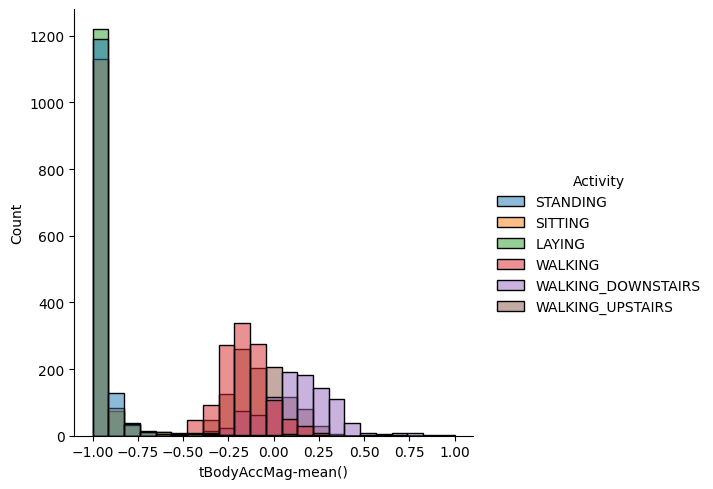

In [ ]:
sns.displot(train_df,x='tBodyAccMag-mean()',hue='Activity')

In [ ]:
px.box(train_df, x='Activity',y='tBodyAccMag-mean()')

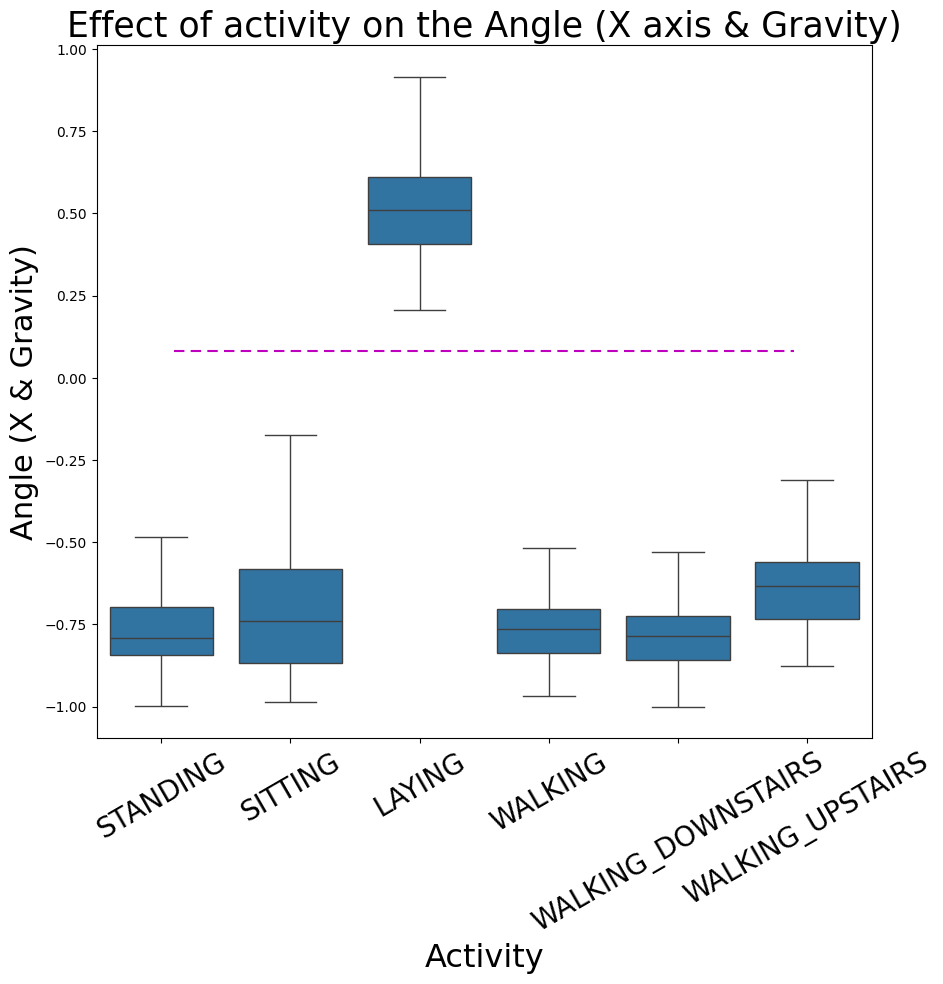

In [ ]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_df, showfliers=False)
plt.axhline(y=0.08,xmin=0.1,xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=25)
plt.xlabel("Activity", size=23)
plt.ylabel('Angle (X & Gravity)', size=22)
plt.xticks(rotation=30,fontsize=20)
plt.show()

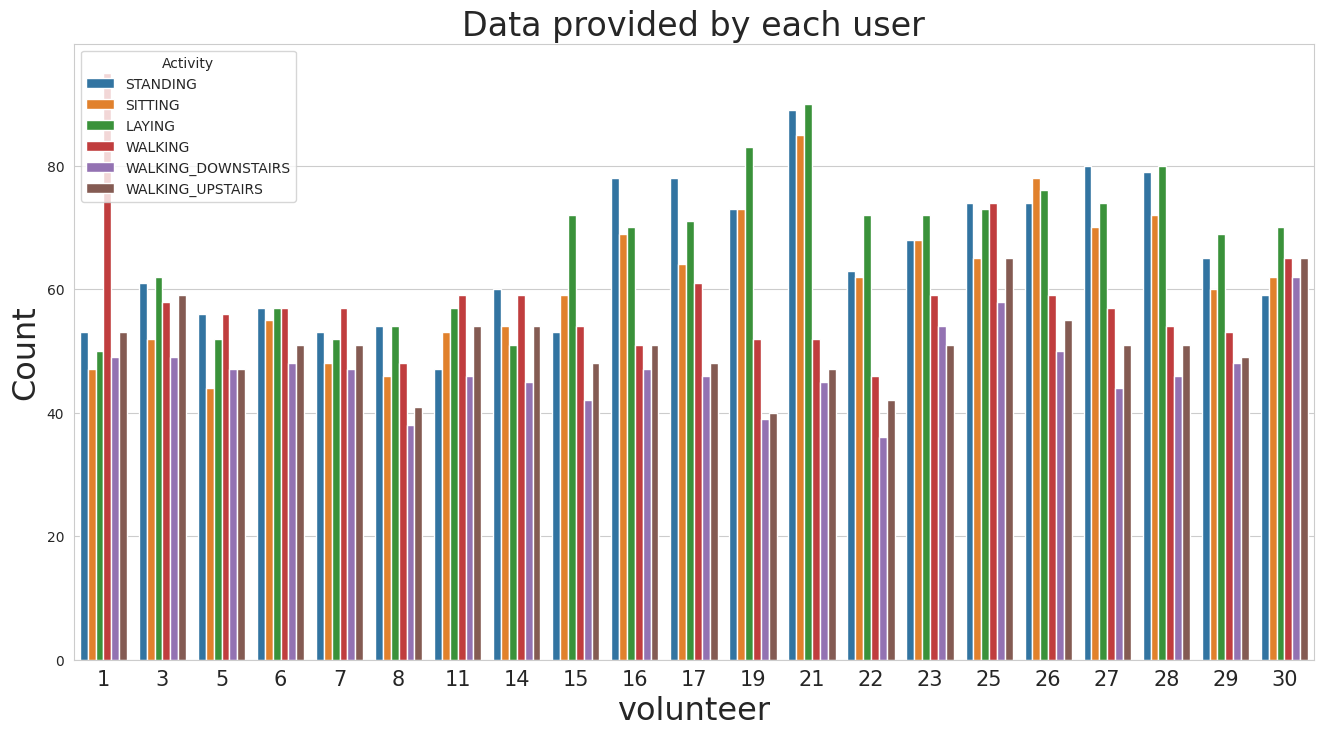

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.color_palette("tab10")
plt.title('Data provided by each user', fontsize=24)
sns.countplot(x='subject',hue='Activity',data=train_df)
plt.xlabel("volunteer", size=23)
plt.ylabel("Count", size=23)
plt.xticks(size=15)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, \
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.017s...
[t-SNE] Computed neighbors for 7352 samples in 2.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.145s
[t-SNE] Iteration 50: error = 89.2797012, gradient norm = 0.0292909 (50 iterations in 9.937s)
[t-SNE] Iteration 100: error = 82.9588242, gradient norm = 0.0079870 (50 iterations in 4.192s)
[t-SNE] Iteration 150: error = 81.5908203, gradient norm = 0

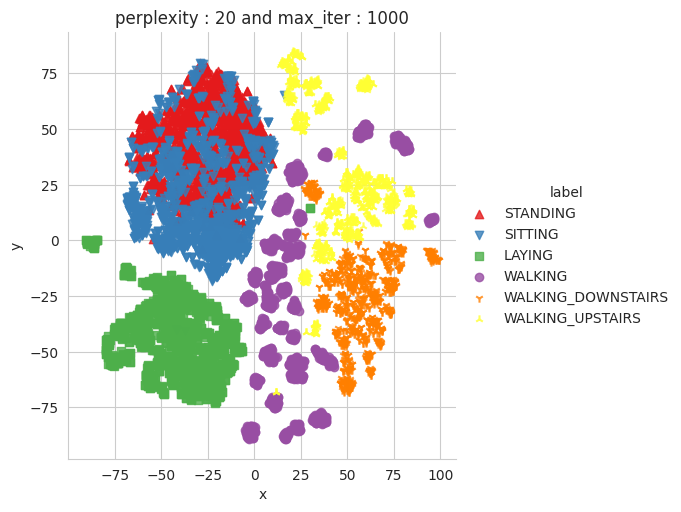

Done


In [ ]:
X_pre_tsne=train_df.drop(['subject','Activity'],axis=1)
y_pre_tsne=train_df['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20])

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Separate features and target
X = train_df.drop('Activity', axis=1)
y = train_df['Activity']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


<Axes: >

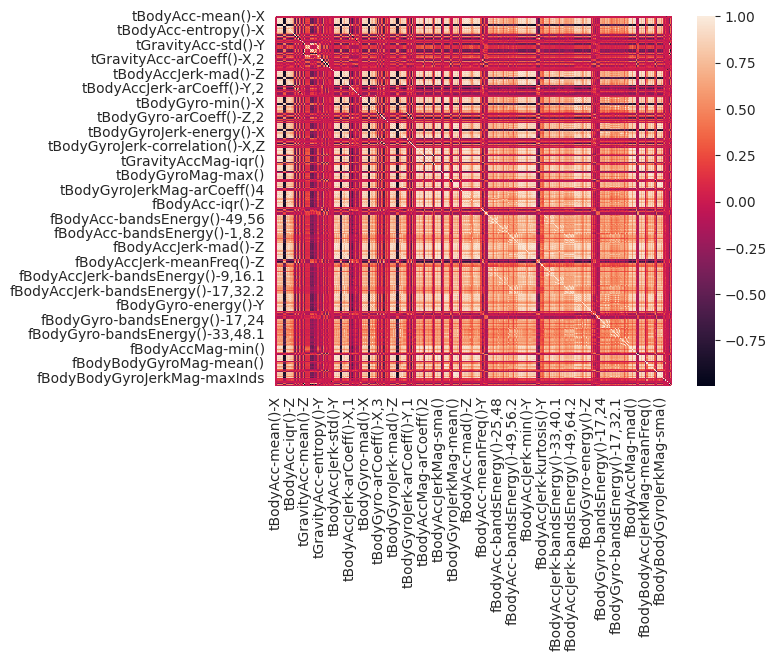

In [ ]:
sns.heatmap(X_train.corr())

#performance varience threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)


In [ ]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [ ]:
sum(sel.get_support())


370

In [ ]:
columns = X_train.columns[sel.get_support()]


In [ ]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=370)

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)




In [ ]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5881, 370)
(1471, 370)


In [ ]:
from sklearn.feature_selection import VarianceThreshold
v= VarianceThreshold(threshold=0.05)


In [ ]:
v.fit(X_train)

VarianceThreshold(threshold=0.05)

In [ ]:
v.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
X_train.corr()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209,-0.067715
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180,-0.119283
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824,-0.049923
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139,-0.066568
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548,-0.118213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311,0.001765
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642,0.031829
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205,-0.012919
"angle(Z,gravityMean)",0.393209,0.432180,0.480824,0.389139,0.430548,0.477627,0.404088,0.424181,0.416249,-0.392253,...,0.054520,0.049765,-0.004092,-0.014265,-0.011178,-0.009311,-0.642642,0.596205,1.000000,-0.099749


#ANOVA Technique

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel.get_support()]


Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-mad()-X',
       'tBodyAcc-mad()-Y', 'tBodyAcc-max()-X', 'tBodyAcc-min()-X',
       'tBodyAcc-min()-Y', 'tBodyAcc-sma()', 'tBodyAcc-iqr()-X',
       'tBodyAcc-iqr()-Y', 'tGravityAcc-mean()-X', 'tGravityAcc-max()-X',
       'tGravityAcc-min()-X', 'tGravityAcc-energy()-X', 'tBodyAccJerk-std()-X',
       'tBodyAccJerk-std()-Y', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y',
       'tBodyAccJerk-max()-X', 'tBodyAccJerk-sma()', 'tBodyAccJerk-iqr()-X',
       'tBodyAccJerk-iqr()-Y', 'tBodyAccJerk-entropy()-X',
       'tBodyAccJerk-entropy()-Y', 'tBodyAccJerk-entropy()-Z',
       'tBodyGyro-sma()', 'tBodyGyroJerk-iqr()-Z', 'tBodyGyroJerk-entropy()-X',
       'tBodyGyroJerk-entropy()-Y', 'tBodyGyroJerk-entropy()-Z',
       'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()',
       'tBodyAccMag-max()', 'tBodyAccMag-sma()', 'tBodyAccMag-entropy()',
       'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-mad()',

In [ ]:
columns = X_train.columns[sel.get_support()]

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)


In [ ]:
print(X_train.shape)
print(X_test.shape)


(5881, 100)
(1471, 100)


In [ ]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-max()-X,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-sma(),tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,...,fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroJerkMag-entropy(),"angle(X,gravityMean)"
0,-0.994425,-0.994873,-0.994939,-0.993994,-0.938974,0.846922,0.691468,-0.996637,-0.995546,-0.992816,...,-0.993151,-0.992185,-0.988654,-0.995458,-0.993151,-0.985239,-1.000000,-0.896695,-1.000000,0.398881
1,-0.326331,0.069663,-0.343326,0.039623,-0.310961,0.271334,0.039452,-0.137449,-0.378012,-0.329234,...,-0.521200,-0.622341,-0.569238,-0.665064,-0.521200,-0.621611,0.035018,0.505120,0.353098,-0.474013
2,-0.026220,-0.032163,-0.118256,-0.030279,0.370607,0.118277,0.072295,0.161658,-0.365323,-0.183492,...,-0.157386,-0.182917,-0.044326,-0.329740,-0.157386,-0.137649,0.414194,0.481166,0.267168,-0.819001
3,-0.981092,-0.901124,-0.984417,-0.901405,-0.922291,0.825370,0.642789,-0.956746,-0.988789,-0.923185,...,-0.974651,-0.977295,-0.969982,-0.983427,-0.974651,-0.969055,-0.940965,-0.344307,-0.648647,-0.744428
4,-0.997380,-0.983893,-0.997331,-0.985196,-0.942062,0.853330,0.687431,-0.992214,-0.997176,-0.989794,...,-0.992783,-0.993290,-0.991747,-0.994202,-0.992783,-0.992792,-1.000000,-0.678570,-0.955696,-0.615329


In [ ]:
train_df['activity_code']= train_df.Activity.astype('category').cat.codes

In [ ]:
train_df.activity_code

,activity_code
0,2
1,2
2,2
3,2
4,2
...,...
7347,5
7348,5
7349,5
7350,5


In [ ]:
d1=train_df.drop('Activity',axis=1)
d1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity_code
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,5
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,5
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,5
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,5


In [ ]:
xcol=d1.columns.to_list()
xcol.pop(-1)
xdata=d1[xcol]
ycol='activity_code'

In [ ]:

x_train, x_test, y_train, y_test =train_test_split(d1[xcol],d1[ycol].values,test_size =0.1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6616, 562), (736, 562), (6616,), (736,))

In [ ]:
y_test

array([5, 2, 2, 4, 1, 3, 2, 2, 4, 5, 0, 2, 2, 1, 5, 1, 0, 2, 2, 3, 5, 3,
       3, 5, 4, 1, 1, 1, 0, 4, 3, 5, 4, 0, 2, 2, 1, 0, 2, 2, 5, 5, 5, 4,
       3, 5, 1, 5, 0, 0, 2, 3, 5, 2, 1, 0, 3, 4, 1, 5, 2, 1, 5, 5, 4, 2,
       3, 5, 0, 0, 0, 0, 3, 0, 4, 3, 3, 4, 0, 5, 4, 1, 1, 3, 5, 4, 2, 4,
       5, 4, 2, 5, 2, 5, 1, 2, 2, 3, 2, 4, 2, 2, 5, 2, 2, 0, 3, 1, 1, 1,
       1, 2, 3, 2, 4, 3, 1, 1, 1, 2, 4, 1, 5, 4, 3, 3, 3, 5, 3, 3, 1, 0,
       1, 3, 0, 0, 1, 3, 1, 5, 2, 2, 5, 4, 5, 2, 4, 2, 4, 1, 3, 3, 5, 0,
       0, 3, 1, 3, 5, 1, 4, 0, 2, 5, 5, 1, 1, 3, 3, 1, 2, 2, 3, 5, 0, 0,
       5, 5, 5, 0, 2, 4, 3, 3, 1, 1, 2, 4, 4, 2, 1, 1, 3, 5, 2, 0, 2, 3,
       3, 2, 0, 2, 1, 1, 0, 2, 3, 1, 1, 4, 1, 3, 0, 4, 5, 2, 5, 2, 4, 5,
       1, 0, 0, 0, 2, 3, 1, 2, 4, 2, 0, 2, 2, 2, 4, 4, 5, 1, 3, 0, 0, 1,
       2, 5, 5, 2, 2, 4, 3, 1, 2, 2, 1, 0, 2, 1, 2, 5, 0, 5, 0, 5, 4, 2,
       4, 5, 4, 2, 5, 4, 2, 2, 2, 3, 0, 1, 3, 5, 1, 1, 5, 2, 3, 2, 4, 1,
       2, 5, 0, 3, 5, 2, 3, 3, 0, 1, 3, 4, 3, 0, 0,

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=8)

In [ ]:
rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train, y_train)
y_train_pred=rf.predict(x_train)#predicting train data
y_test_pred=rf.predict(x_test)

In [ ]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred))

Training Accuracy  1.0
Testing Accuracy  0.9823369565217391


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=8)

In [ ]:
rf.fit(x_train, y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

In [ ]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred))

Training Accuracy  0.9876058041112454
Testing Accuracy  0.9782608695652174


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       0.98      0.96      0.97      1160
           2       0.96      0.99      0.97      1233
           3       1.00      0.99      1.00      1101
           4       0.99      1.00      0.99       889
           5       0.99      1.00      1.00       957

    accuracy                           0.99      6616
   macro avg       0.99      0.99      0.99      6616
weighted avg       0.99      0.99      0.99      6616



In [ ]:
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       0.97      0.93      0.95       126
           2       0.94      0.97      0.96       141
           3       1.00      0.99      1.00       125
           4       0.98      0.99      0.98        97
           5       0.98      0.99      0.99       116

    accuracy                           0.98       736
   macro avg       0.98      0.98      0.98       736
weighted avg       0.98      0.98      0.98       736



In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))


Training Accuracy: 0.9542019347037485
Testing Accuracy: 0.9456521739130435


In [ ]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1276
           1       0.90      0.85      0.88      1160
           2       0.88      0.91      0.89      1233
           3       0.99      1.00      0.99      1101
           4       1.00      0.99      0.99       889
           5       0.99      0.99      0.99       957

    accuracy                           0.95      6616
   macro avg       0.96      0.96      0.96      6616
weighted avg       0.95      0.95      0.95      6616



In [ ]:
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       0.91      0.83      0.87       126
           2       0.88      0.93      0.90       141
           3       0.97      1.00      0.98       125
           4       0.98      0.97      0.97        97
           5       0.97      0.96      0.97       116

    accuracy                           0.95       736
   macro avg       0.95      0.95      0.95       736
weighted avg       0.95      0.95      0.95       736



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=11, min_samples_leaf=15, min_samples_split=11)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=15, min_samples_split=11)

In [ ]:
y_train_pred = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9603990326481258
Testing Accuracy: 0.9334239130434783


In [ ]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       0.95      0.96      0.96      1160
           2       0.96      0.96      0.96      1233
           3       0.95      0.96      0.96      1101
           4       0.95      0.93      0.94       889
           5       0.94      0.94      0.94       957

    accuracy                           0.96      6616
   macro avg       0.96      0.96      0.96      6616
weighted avg       0.96      0.96      0.96      6616



In [ ]:
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       0.91      0.90      0.90       126
           2       0.92      0.92      0.92       141
           3       0.94      0.94      0.94       125
           4       0.92      0.93      0.92        97
           5       0.91      0.91      0.91       116

    accuracy                           0.93       736
   macro avg       0.93      0.93      0.93       736
weighted avg       0.93      0.93      0.93       736



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9879081015719468
Testing Accuracy: 0.9714673913043478


In [ ]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       0.98      0.95      0.97      1160
           2       0.96      0.98      0.97      1233
           3       1.00      1.00      1.00      1101
           4       1.00      1.00      1.00       889
           5       1.00      1.00      1.00       957

    accuracy                           0.99      6616
   macro avg       0.99      0.99      0.99      6616
weighted avg       0.99      0.99      0.99      6616



In [ ]:
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       0.93      0.93      0.93       126
           2       0.94      0.94      0.94       141
           3       0.98      1.00      0.99       125
           4       1.00      0.97      0.98        97
           5       0.98      1.00      0.99       116

    accuracy                           0.97       736
   macro avg       0.97      0.97      0.97       736
weighted avg       0.97      0.97      0.97       736



LSTM

In [ ]:
X_train=train_df.drop('Activity',axis=1)
Y_train=train_df['Activity']
X_test=test_df.drop('Activity',axis=1)
Y_test=test_df['Activity']

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

In [ ]:
# Assuming 'activity_code' is the problematic column
# Remove 'activity_code' from X_train before fitting the scaler

X_train=train_df.drop(['Activity', 'activity_code'],axis=1) # Remove activity_code here
Y_train=train_df['Activity']
X_test=test_df.drop('Activity',axis=1) # Ensure activity_code is not present here
Y_test=test_df['Activity']

# Now proceed with scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ... rest of your code

In [ ]:
def build_lstm_model(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape))
    model.add(Dropout(0.7))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.7))
    model.add(Dense(6, activation='softmax'))
    return model

def train_lstm_model(X_train, Y_train, X_val, Y_val, batch_size=32, epochs=45):
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]), len(np.unique(Y_train)))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, Y_val), callbacks=[early_stopping], verbose=1)
    return model, history

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = build_lstm_model((X_train_reshaped.shape[1], X_train_reshaped.shape[2]), len(np.unique(Y_train_encoded)))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │         353,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 362,438 (1.38 MB)

 Trainable params: 362,438 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_model, lstm_history = train_lstm_model(X_train_reshaped, Y_train_encoded,
                                            X_test_reshaped, Y_test_encoded)

Epoch 1/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4791 - loss: 1.2734 - val_accuracy: 0.8704 - val_loss: 0.3223
Epoch 2/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8058 - loss: 0.4887 - val_accuracy: 0.9308 - val_loss: 0.1944
Epoch 3/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8644 - loss: 0.3569 - val_accuracy: 0.9484 - val_loss: 0.1536
Epoch 4/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9026 - loss: 0.2680 - val_accuracy: 0.9406 - val_loss: 0.1574
Epoch 5/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9097 - loss: 0.2424 - val_accuracy: 0.9447 - val_loss: 0.1534
Epoch 6/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9297 - loss: 0.2019 - val_accuracy: 0.9440 - val_loss: 0.1672
Epoch 7/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9294 - loss: 0.2043 - val_accuracy: 0.9481 - val_loss: 0.1557
Epoch 8/45
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9347 - loss: 0.1911 - val_accuracy: 0

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

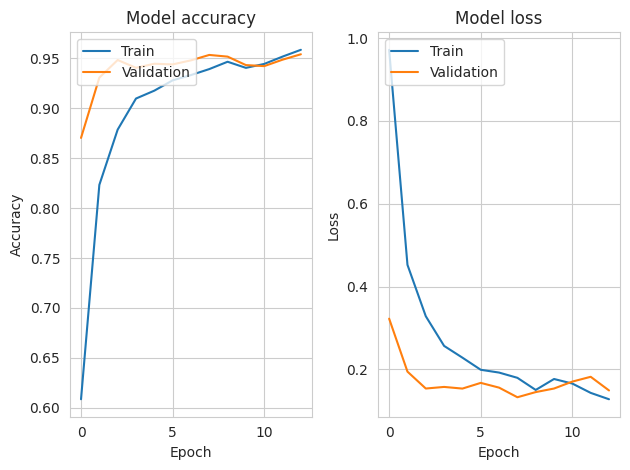

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Testing Accuracy: 0.9535120461486257


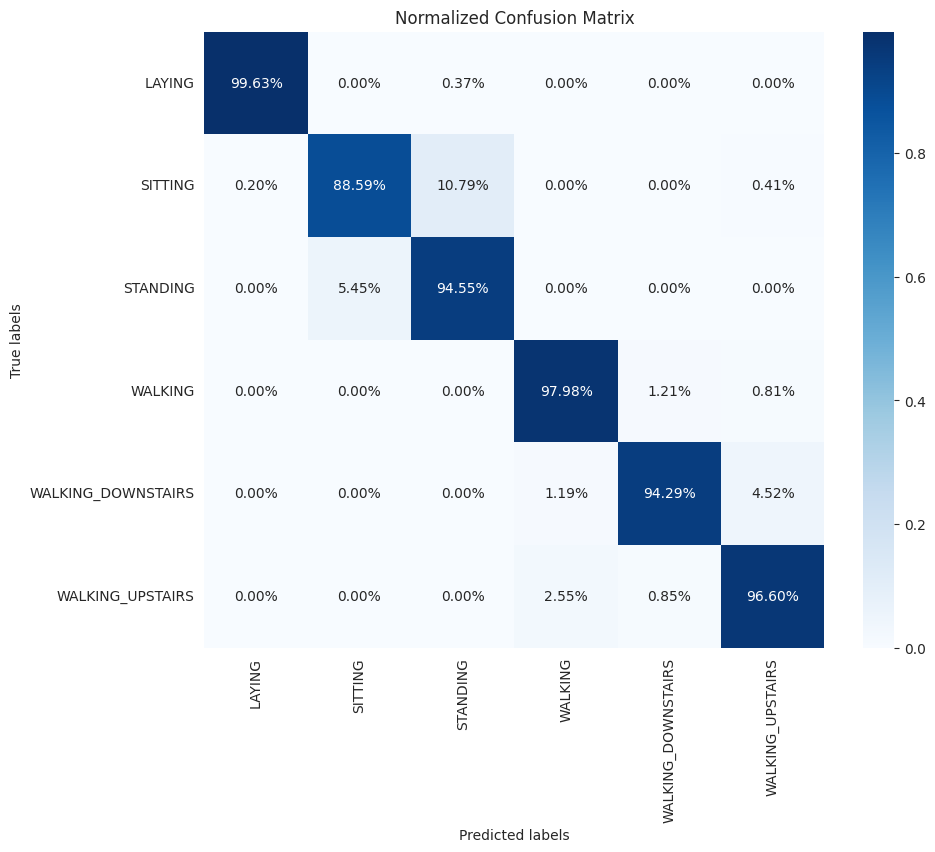

In [ ]:
def evaluate_model(model, X_test, Y_test):
    Y_pred_prob = model.predict(X_test)
    Y_pred = np.argmax(Y_pred_prob, axis=1)
    testing_accuracy = accuracy_score(Y_test, Y_pred)
    print("Testing Accuracy:", testing_accuracy)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    #print("Confusion Matrix:")
    #print(conf_matrix)

    # Normalize confusion matrix
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Display confusion matrix as heatmap with percentages
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Normalized Confusion Matrix')
    plt.show()

    return testing_accuracy, conf_matrix

# Evaluate LSTM model
testing_accuracy, conf_matrix = evaluate_model(lstm_model, X_test_reshaped, Y_test_encoded)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def evaluate_model(model, X_test, Y_test, label_encoder=None):
    Y_pred_prob = model.predict(X_test)
    Y_pred = np.argmax(Y_pred_prob, axis=1)
    testing_accuracy = accuracy_score(Y_test, Y_pred)
    print("Testing Accuracy:", testing_accuracy)
    conf_matrix = confusion_matrix(Y_test, Y_pred)



    # Classification Report
    if label_encoder:
        target_names = label_encoder.classes_
    else:
        target_names = None
    report = classification_report(Y_test, Y_pred, target_names=target_names)
    print("Classification Report:\n", report)

    return testing_accuracy, conf_matrix

# Evaluate LSTM model
testing_accuracy, conf_matrix = evaluate_model(lstm_model, X_test_reshaped, Y_test_encoded, label_encoder=label_encoder)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testing Accuracy: 0.9535120461486257
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.89      0.91       491
          STANDING       0.90      0.95      0.92       532
           WALKING       0.97      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.94      0.96       420
  WALKING_UPSTAIRS       0.95      0.97      0.96       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



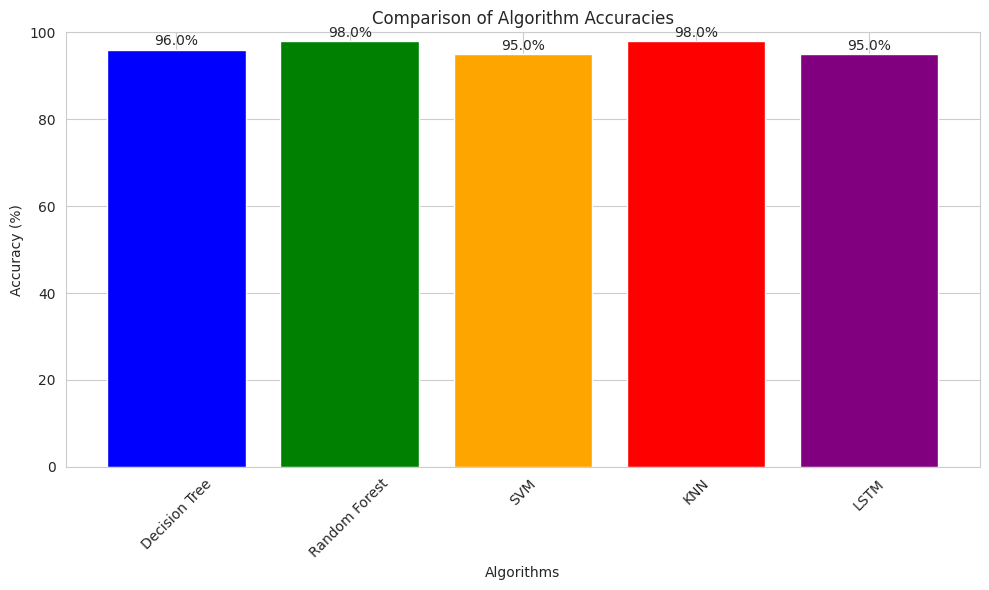

In [ ]:
import matplotlib.pyplot as plt


algorithms = ['Decision Tree', 'Random Forest', 'SVM',  'KNN', 'LSTM']
accuracies = [96, 98,95, 98, 95]  # Replace with your actual accuracy values


plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan'])


plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim(0, 100)
plt.xticks(rotation=45)


for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.1f}%', ha='center', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()
